In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import ta
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.neural_network import MLPRegressor

ModuleNotFoundError: No module named 'ta'

In [2]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['AAPL', 'MSFT', '^GSPC']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2013-01-01'
end_date = '2018-07-15'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader('MSFT', 'iex', start_date, end_date)

5y


In [2]:
pip install ta

Looking in indexes: https://pypi.org/simple, https://nexus.carnext.io/repository/python-data/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.8.0-py3-none-any.whl size=28895 sha256=f2ac78f66359e06bd220d458a337eb68b61706105d56f15182a8fbac53008803
  Stored in directory: /Users/alexkayal/Library/Caches/pip/wheels/fc/70/ae/a83dc5fd06e1982a6960039a4d7cdb22c408c70c8c29def5cb
Successfully built ta
Note: you may need to restart the kernel to use updated packages.


In [3]:
panel_data.head()

,open,high,low,close,volume
date,,,,,
2013-07-16,31.7274,32.0973,31.6833,31.9565,36378481
2013-07-17,32.0181,32.0622,31.2692,31.4895,37281516
2013-07-18,31.4719,31.6216,31.0313,31.2252,49118611
2013-07-19,28.5467,28.7846,27.3308,27.6656,248354245
2013-07-22,27.9300,28.2031,27.8419,28.2031,79024753


1259


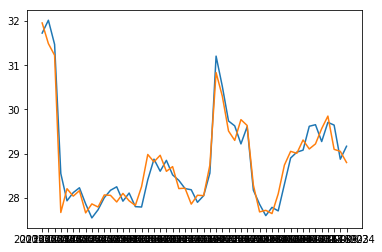

In [4]:
plt.plot(panel_data['open'][:50])
plt.plot(panel_data['close'][:50])
print (len(panel_data))

In [5]:
df = panel_data 

In [6]:
# x = ta.trend.ema_fast(df['close'], n_fast=10 ,fillna=True)
# y = ta.trend.ema_slow(df['close'], n_slow=100 ,fillna=True)
rsi14  = ta.momentum.rsi(df['close'], n=14, fillna=False)
mv3 = df['close'].rolling(window=3).mean()
mv10 = df['close'].rolling(window=10).mean()

# df = df.append
# dft = df.append(r, axis=0)
# print (type(df['close']))
# print (type(r))
# df['close']

In [ ]:
plt.plot(panel_data['close'][14:])
plt.plot(r[14:])

In [8]:
# dff = pd.concat([rsi14, mv3, mv10, df['close']], axis=1)[14:]
dff = pd.concat([rsi14, mv3, mv10], axis=1)[14:]
Y = df['close'][14:]
Y

date
2013-08-05     27.9300
2013-08-06     27.8242
2013-08-07     28.2498
2013-08-08     28.9784
2013-08-09     28.8110
2013-08-12     28.9608
2013-08-13     28.5970
2013-08-14     28.7035
2013-08-15     28.2066
2013-08-16     28.2155
2013-08-19     27.8544
2013-08-20     28.0558
2013-08-21     28.0469
2013-08-22     28.7390
2013-08-23     30.8330
2013-08-26     30.3006
2013-08-27     29.5109
2013-08-28     29.2980
2013-08-29     29.7682
2013-08-30     29.6351
2013-09-03     28.2865
2013-09-04     27.6787
2013-09-05     27.7142
2013-09-06     27.6405
2013-09-09     28.0868
2013-09-10     28.7390
2013-09-11     29.0495
2013-09-12     29.0052
2013-09-13     29.3068
2013-09-16     29.1037
                ...   
2018-06-01    100.7900
2018-06-04    101.6700
2018-06-05    102.1900
2018-06-06    102.4900
2018-06-07    100.8800
2018-06-08    101.6300
2018-06-11    101.0500
2018-06-12    101.3100
2018-06-13    100.8500
2018-06-14    101.4200
2018-06-15    100.1300
2018-06-18    100.8600
2018-0

In [10]:
n = int(len(dff)*0.8)


X_train = dff[:n]
Y_train = Y[:n]
X_test = dff[n:]
Y_test = Y[n:]
print (len(X_train))

996


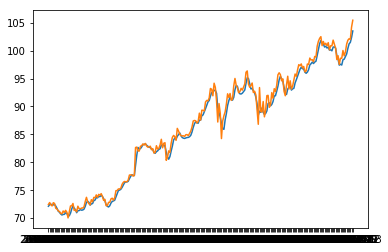

In [26]:
model = MLPRegressor(hidden_layer_sizes=4, max_iter=1000)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
plt.plot(predicted)
plt.plot(Y_test)
# predicted
